In [1]:
import pandas as pd

df = pd.read_excel("both db.xlsx", sheet_name="summer")


In [2]:
df.head()       # Shows the first five rows
df.info()       # Gives an overview of columns, data types, and non-null counts
df.describe()   # Provides summary statistics for numeric columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   species  744 non-null    object 
 1   PSSRa    744 non-null    float64
 2   PSSRb    744 non-null    float64
 3   RARSc    744 non-null    float64
 4   PSSRc    744 non-null    float64
 5   CARI     744 non-null    float64
 6   NDVI705  744 non-null    float64
 7   PSNDa    744 non-null    float64
 8   YI       744 non-null    float64
 9   RES      744 non-null    float64
 10  PRI      744 non-null    float64
 11  NDVIa    744 non-null    float64
 12  NDVIb    744 non-null    float64
dtypes: float64(12), object(1)
memory usage: 75.7+ KB


,PSSRa,PSSRb,RARSc,PSSRc,CARI,NDVI705,PSNDa,YI,RES,PRI,NDVIa,NDVIb
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,6.931892,6.150310,5.377358,5.383945,1.407607,0.438281,0.719916,-0.007455,0.400472,0.039079,0.714388,0.711895
std,2.753838,2.433866,2.057148,2.055339,0.654347,0.092965,0.087538,0.003932,0.093192,0.015559,0.087137,0.087786
min,2.379702,2.342322,1.934046,1.913839,0.352701,0.167501,0.408232,-0.020068,0.214522,-0.003652,0.401591,0.392700
25%,5.118320,4.457897,3.972182,3.977449,0.957658,0.368625,0.673113,-0.009909,0.319985,0.028149,0.667548,0.665328
50%,6.140668,5.538846,4.870609,4.900425,1.217905,0.449190,0.719914,-0.007460,0.386674,0.038160,0.715838,0.713396
75%,7.936846,7.143334,6.277664,6.297254,1.772151,0.516768,0.776207,-0.005626,0.476209,0.049077,0.769067,0.767464
max,15.674217,15.186808,12.468778,12.375205,3.813228,0.638737,0.880054,0.011261,0.621575,0.080099,0.875159,0.874288


Free attempt - 5 indices - straightforward

Accuracy: 0.738255033557047


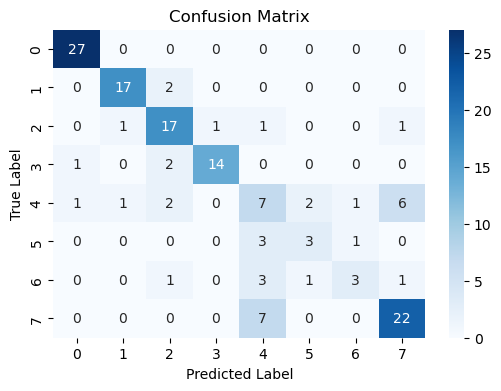

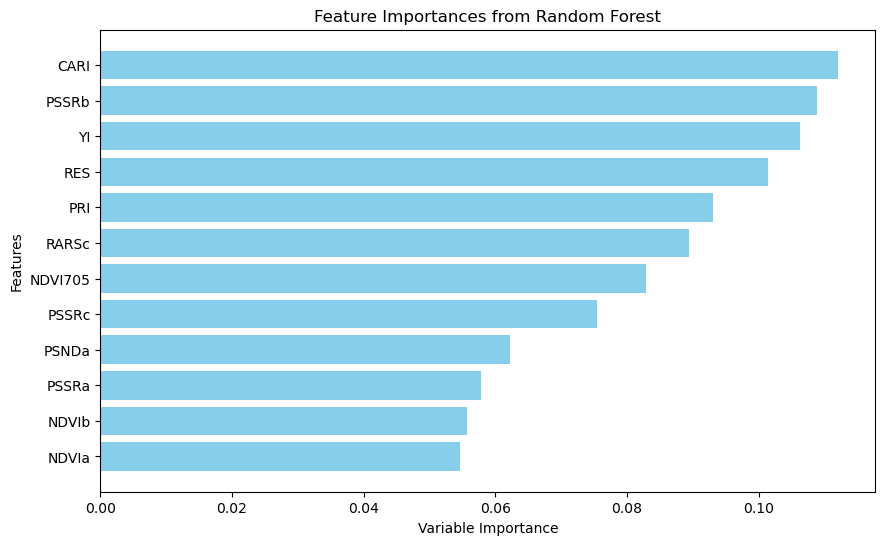

,CHEAL,CYPES,ECHCG,GASCI,Maize,Morello,Pignoletto,SORHA
CHEAL,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CYPES,0.000000,89.473684,10.526316,0.000000,0.000000,0.000000,0.000000,0.000000
ECHCG,0.000000,4.761905,80.952381,4.761905,4.761905,0.000000,0.000000,4.761905
GASCI,5.882353,0.000000,11.764706,82.352941,0.000000,0.000000,0.000000,0.000000
Maize,5.000000,5.000000,10.000000,0.000000,35.000000,10.000000,5.000000,30.000000
Morello,0.000000,0.000000,0.000000,0.000000,42.857143,42.857143,14.285714,0.000000
Pignoletto,0.000000,0.000000,11.111111,0.000000,33.333333,11.111111,33.333333,11.111111
SORHA,0.000000,0.000000,0.000000,0.000000,24.137931,0.000000,0.000000,75.862069


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming 'df' is your DataFrame and 'target' is the name of your target column:
X = df.drop("species", axis=1)  # Features
y = df["species"]               # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)

# Initialize and train the random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df

importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Variable Importance')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

cm_df

Is grid search even necessary if the result is no good?

Define the terms for 3 step classification

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example lists of species for each category
monocot_species = ["CYPES","ECHCG","Maize","SORHA","Pignoletto","Morello"]  # example species
dicot_species   = ["CHEAL","GASCI"]
weed_species    = ["CYPES","ECHCG","SORHA","CHEAL","GASCI"]  # example of some species labeled as weeds
crop_species    = ["Maize","Pignoletto","Morello"]

# Third-level species groups (adjust these depending on your actual data):
monocot_weed_species = ["CYPES","ECHCG","SORHA"]
monocot_crop_species = [ "Maize","Pignoletto","Morello"]
dicot_weed_species   = ["CHEAL","GASCI"]

# Assume df is your main dataframe with features and species
# Example:
# df = pd.read_csv("your_data.csv")

# Create first-level category
df['category1'] = df['species'].apply(lambda s: 'monocot' if s in monocot_species else 'dicot')
# Create second-level category
df['category2'] = df['species'].apply(lambda s: 'weed' if s in weed_species else 'crop')

print(df[['category1', 'category2']].value_counts())

category1  category2
monocot    weed         343
dicot      weed         219
monocot    crop         182
Name: count, dtype: int64


Level 1: Monocot vs Dicot 

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example lists of species for each category
monocot_species = ["CYPES","ECHCG","Maize","SORHA","Pignoletto","Morello"]  # example species
dicot_species   = ["CHEAL","GASCI"]
weed_species    = ["CYPES","ECHCG","SORHA","CHEAL","GASCI"]  # example of some species labeled as weeds
crop_species    = ["Maize","Pignoletto","Morello"]

# Third-level species groups (adjust these depending on your actual data):
monocot_weed_species = ["CYPES","ECHCG","SORHA"]
monocot_crop_species = [ "Maize","Pignoletto","Morello"]
dicot_weed_species   = ["CHEAL","GASCI"]


# Assume df is your main dataframe with features and species
# Example:
# df = pd.read_csv("your_data.csv")

# Create first-level category
df['category1'] = df['species'].apply(lambda s: 'monocot' if s in monocot_species else 'dicot')
# Create second-level category
df['category2'] = df['species'].apply(lambda s: 'weed' if s in weed_species else 'crop')

# Features and target
X = df[["PSSRa", "PSSRb", "RARSc", "PSSRc", "CARI","PSNDa", "YI", "NDVI705", "RES", "PRI","NDVIa","NDVIb"]]
y_cat1 = df["category1"]  # Level 1 target

# Level 1: Monocot vs Dicot
X_train_cat1, X_test_cat1, y_train_cat1, y_test_cat1 = train_test_split(X, y_cat1, test_size=0.2, random_state=42, stratify=y_cat1)
clf_cat1 = RandomForestClassifier(random_state=42)
clf_cat1.fit(X_train_cat1, y_train_cat1)

y_pred_cat1 = clf_cat1.predict(X_test_cat1)

# Split test data by predicted category1
X_test_monocot = X_test_cat1[y_pred_cat1 == 'monocot']
X_test_dicot   = X_test_cat1[y_pred_cat1 == 'dicot']

y_test_monocot = df.loc[X_test_monocot.index, 'category2']
y_test_dicot   = df.loc[X_test_dicot.index, 'category2']

# Level 2: Weed vs Crop (for monocot)
monocot_mask = df['category1'] == 'monocot'
X_monocot = X[monocot_mask]
y_monocot = df['category2'][monocot_mask]

X_train_mono, X_val_mono, y_train_mono, y_val_mono = train_test_split(X_monocot, y_monocot, test_size=0.2, random_state=42, stratify=y_monocot)
clf_cat2_monocot = RandomForestClassifier(random_state=42)
clf_cat2_monocot.fit(X_train_mono, y_train_mono)

y_pred_cat2_monocot = clf_cat2_monocot.predict(X_test_monocot)

# Level 2: Weed vs Crop (for dicot)
dicot_mask = df['category1'] == 'dicot'
X_dicot = X[dicot_mask]
y_dicot = df['category2'][dicot_mask]

X_train_di, X_val_di, y_train_di, y_val_di = train_test_split(X_dicot, y_dicot, test_size=0.2, random_state=42, stratify=y_dicot)
clf_cat2_dicot = RandomForestClassifier(random_state=42)
clf_cat2_dicot.fit(X_train_di, y_train_di)

y_pred_cat2_dicot = clf_cat2_dicot.predict(X_test_dicot)

# Now we have predictions for category1 and category2. Next: species level.

# For the third level, we train separate models for each final group:
# Monocot-Weed, Monocot-Crop, Dicot-Weed, Dicot-Crop.

# Example: Monocot-Weed model (if multiple species in that group)
mono_weed_mask = (df['category1'] == 'monocot') & (df['category2'] == 'weed')
X_mono_weed = X[mono_weed_mask]
y_mono_weed = df['species'][mono_weed_mask]

clf_mono_weed = RandomForestClassifier(random_state=42)
clf_mono_weed.fit(X_mono_weed, y_mono_weed)

# Monocot-Crop model
mono_crop_mask = (df['category1'] == 'monocot') & (df['category2'] == 'crop')
X_mono_crop = X[mono_crop_mask]
y_mono_crop = df['species'][mono_crop_mask]

clf_mono_crop = RandomForestClassifier(random_state=42)
clf_mono_crop.fit(X_mono_crop, y_mono_crop)

# Dicot-Weed model
dicot_weed_mask = (df['category1'] == 'dicot') & (df['category2'] == 'weed')
X_dicot_weed = X[dicot_weed_mask]
y_dicot_weed = df['species'][dicot_weed_mask]

clf_dicot_weed = RandomForestClassifier(random_state=42)
clf_dicot_weed.fit(X_dicot_weed, y_dicot_weed)



# Predict species level on the test set:
# For each test sample, use the predicted category1 and category2 to decide which classifier to use at level 3.

final_species_preds = []

for idx in X_test_cat1.index:
    cat1_pred = clf_cat1.predict(X_test_cat1.loc[[idx]])[0]
    if cat1_pred == 'monocot':
        cat2_pred = clf_cat2_monocot.predict(X_test_cat1.loc[[idx]])[0]  # use monocot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_mono_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_mono_crop.predict(X_test_cat1.loc[[idx]])[0]
    else:  # dicot
        cat2_pred = clf_cat2_dicot.predict(X_test_cat1.loc[[idx]])[0]  # use dicot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_dicot_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_dicot_crop.predict(X_test_cat1.loc[[idx]])[0]

    final_species_preds.append(sp_pred)

final_species_preds = np.array(final_species_preds)
y_test_species = df.loc[X_test_cat1.index, 'species']

# Evaluate accuracy of final species predictions:
final_accuracy = accuracy_score(y_test_species, final_species_preds)
print("Final Species-Level Accuracy:", final_accuracy)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_species,final_species_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test_species)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df



Final Species-Level Accuracy: 0.9798657718120806


,CHEAL,CYPES,ECHCG,GASCI,Maize,Morello,Pignoletto,SORHA
CHEAL,100.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000
CYPES,0.0,100.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000
ECHCG,0.0,0.0,90.47619,4.761905,4.761905,0.0,0.000000,0.000000
GASCI,0.0,0.0,0.00000,100.000000,0.000000,0.0,0.000000,0.000000
Maize,0.0,0.0,0.00000,0.000000,100.000000,0.0,0.000000,0.000000
Morello,0.0,0.0,0.00000,0.000000,0.000000,100.0,0.000000,0.000000
Pignoletto,0.0,0.0,0.00000,0.000000,0.000000,0.0,92.857143,7.142857
SORHA,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,100.000000


In [12]:
# Features and target
X = df[["PSSRa", "PSSRb", "RARSc", "PSSRc", "CARI","PSNDa", "YI", "NDVI705", "RES", "PRI","NDVIa","NDVIb"]]
y_cat1 = df["category1"]  # Level 1 target
# Level 1: Monocot vs Dicot
X_train_cat1, X_test_cat1, y_train_cat1, y_test_cat1 = train_test_split(X, y_cat1, test_size=0.2, random_state=42, stratify=y_cat1)
clf_cat1 = RandomForestClassifier(random_state=42)
clf_cat1.fit(X_train_cat1, y_train_cat1)

y_pred_cat1 = clf_cat1.predict(X_test_cat1)


In [13]:
#gridsearch level 1
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# Define a stratified k-fold splitter
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#gridsearch
from sklearn.model_selection import GridSearchCV
# Define a dictionary with the hyperparameters you wish to tune:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=clf_cat1,param_grid=param_grid,cv=skf, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_cat1, y_train_cat1)
# Option 1: Use the best estimator from GridSearchCV
final_model = grid_search.best_estimator_

# Now you can use final_model to predict on new data:
predictions = final_model.predict(X_test_cat1)

In [14]:
# Print out the best parameters and the best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score: 0.9831932773109244


In [35]:
from sklearn.metrics import classification_report
clf_cat1 = RandomForestClassifier(random_state=42, 
                                  max_depth=None,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  n_estimators=100,bootstrap=True)
clf_cat1.fit(X_train_cat1, y_train_cat1)

y_pred_cat1 = clf_cat1.predict(X_test_cat1)
# Generate and print the classification report
report = classification_report(y_test_cat1, y_pred_cat1)
print(report)

              precision    recall  f1-score   support

       dicot       0.98      1.00      0.99        44
     monocot       1.00      0.99      1.00       105

    accuracy                           0.99       149
   macro avg       0.99      1.00      0.99       149
weighted avg       0.99      0.99      0.99       149



In [37]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred_cat1 = clf_cat1.predict(X_test_cat1)
cm = confusion_matrix(y_test_cat1, y_pred_cat1)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test_cat1)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df

,dicot,monocot
dicot,100.000000,0.000000
monocot,0.952381,99.047619


In [39]:
# Split test data by predicted category1
X_test_monocot = X_test_cat1[y_pred_cat1 == 'monocot']
X_test_dicot   = X_test_cat1[y_pred_cat1 == 'dicot']

y_test_monocot = df.loc[X_test_monocot.index, 'category2']
y_test_dicot   = df.loc[X_test_dicot.index, 'category2']


In [41]:
# Level 2: Weed vs Crop (for monocot)
monocot_mask = df['category1'] == 'monocot'
X_monocot = X[monocot_mask]
y_monocot = df['category2'][monocot_mask]

X_train_mono, X_val_mono, y_train_mono, y_val_mono = train_test_split(X_monocot, y_monocot, test_size=0.2, random_state=42, stratify=y_monocot)
clf_cat2_monocot = RandomForestClassifier(random_state=42)
clf_cat2_monocot.fit(X_train_mono, y_train_mono)

y_pred_cat2_monocot = clf_cat2_monocot.predict(X_test_monocot)

In [43]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=clf_cat2_monocot,param_grid=param_grid,cv=skf, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_mono, y_train_mono)
# Option 1: Use the best estimator from GridSearchCV
final_model = grid_search.best_estimator_

# Now you can use final_model to predict on new data:
predictions = final_model.predict(X_test_monocot)

In [45]:
# Print out the best parameters and the best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score: 0.8714285714285716


In [47]:
clf_cat2_monocot = RandomForestClassifier(random_state=42, 
                                  max_depth=20,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  n_estimators=200, bootstrap=True)
clf_cat2_monocot.fit(X_train_mono, y_train_mono)

y_pred_cat2_monocot = clf_cat2_monocot.predict(X_test_monocot)
# Generate and print the classification report
report = classification_report(y_test_monocot, y_pred_cat2_monocot)
print(report)

              precision    recall  f1-score   support

        crop       0.94      0.97      0.96        34
        weed       0.99      0.97      0.98        70

    accuracy                           0.97       104
   macro avg       0.96      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



In [49]:
y_pred_cat2_monocot = clf_cat2_monocot.predict(X_test_monocot)
cm = confusion_matrix(y_test_monocot, y_pred_cat2_monocot)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test_monocot)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df

,crop,weed
crop,97.058824,2.941176
weed,2.857143,97.142857


In [51]:
# Level 2: Weed vs Crop (for dicot)
dicot_mask = df['category1'] == 'dicot'
X_dicot = X[dicot_mask]
y_dicot = df['category2'][dicot_mask]

X_train_di, X_val_di, y_train_di, y_val_di = train_test_split(X_dicot, y_dicot, test_size=0.2, random_state=42, stratify=y_dicot)
clf_cat2_dicot = RandomForestClassifier(random_state=42)
clf_cat2_dicot.fit(X_train_di, y_train_di)

y_pred_cat2_dicot = clf_cat2_dicot.predict(X_test_dicot)


In [53]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=clf_cat2_dicot,param_grid=param_grid,cv=skf, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_di, y_train_di)
# Option 1: Use the best estimator from GridSearchCV
final_model = grid_search.best_estimator_

# Now you can use final_model to predict on new data:
predictions = final_model.predict(X_test_dicot)

C:\Users\benna\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [55]:
# Print out the best parameters and the best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score: 1.0


In [57]:
clf_cat2_dicot = RandomForestClassifier(random_state=42, 
                                  max_depth=None,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  n_estimators=100, bootstrap=True)
clf_cat2_dicot.fit(X_train_di, y_train_di)

y_pred_cat2_dicot = clf_cat2_dicot.predict(X_test_dicot)
# Generate and print the classification report
report = classification_report(y_test_dicot, y_pred_cat2_dicot)
print(report)

              precision    recall  f1-score   support

        weed       1.00      1.00      1.00        45

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [59]:
y_pred_cat2_dicot = clf_cat2_dicot.predict(X_test_dicot)
cm = confusion_matrix(y_test_dicot, y_pred_cat2_dicot)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test_dicot)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df

C:\Users\benna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


,weed
weed,100.0


In [61]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Define a stratified k-fold splitter
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ------------------------------
# Monocot-Weed model
# ------------------------------
mono_weed_mask = (df['category1'] == 'monocot') & (df['category2'] == 'weed')
X_mono_weed = X[mono_weed_mask]
y_mono_weed = df['species'][mono_weed_mask]

param_grid_mono_weed = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_mono_weed = RandomForestClassifier(random_state=42)
grid_mono_weed = GridSearchCV(rf_mono_weed, param_grid=param_grid_mono_weed,
                              cv=skf, scoring='accuracy', n_jobs=-1)
grid_mono_weed.fit(X_mono_weed, y_mono_weed)
clf_mono_weed = grid_mono_weed.best_estimator_
print("Monocot-Weed best parameters:", grid_mono_weed.best_params_)



Monocot-Weed best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [79]:
clf_mono_weed = RandomForestClassifier(random_state=42, 
                                  max_depth=None,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  n_estimators=500,bootstrap=True)
clf_mono_weed.fit(X_mono_weed, y_mono_weed)

RandomForestClassifier(n_estimators=500, random_state=42)

In [65]:
# ------------------------------
# Monocot-Crop model
# ------------------------------
mono_crop_mask = (df['category1'] == 'monocot') & (df['category2'] == 'crop')
X_mono_crop = X[mono_crop_mask]
y_mono_crop = df['species'][mono_crop_mask]

param_grid_mono_crop = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_mono_crop = RandomForestClassifier(random_state=42)
grid_mono_crop = GridSearchCV(rf_mono_crop, param_grid=param_grid_mono_crop,
                              cv=skf, scoring='accuracy', n_jobs=-1)
grid_mono_crop.fit(X_mono_crop, y_mono_crop)
clf_mono_crop = grid_mono_crop.best_estimator_
print("Monocot-Crop best parameters:", grid_mono_crop.best_params_)



Monocot-Crop best parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [77]:
clf_mono_crop = RandomForestClassifier(random_state=42, 
                                  max_depth=10,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  n_estimators=100,bootstrap=False)
clf_mono_crop.fit(X_mono_crop, y_mono_crop)

RandomForestClassifier(bootstrap=False, max_depth=10, random_state=42)

In [69]:
# ------------------------------
# Dicot-Weed model
# ------------------------------
dicot_weed_mask = (df['category1'] == 'dicot') & (df['category2'] == 'weed')
X_dicot_weed = X[dicot_weed_mask]
y_dicot_weed = df['species'][dicot_weed_mask]

param_grid_dicot_weed = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_dicot_weed = RandomForestClassifier(random_state=42)
grid_dicot_weed = GridSearchCV(rf_dicot_weed, param_grid=param_grid_dicot_weed,
                               cv=skf, scoring='accuracy', n_jobs=-1)
grid_dicot_weed.fit(X_dicot_weed, y_dicot_weed)
clf_dicot_weed = grid_dicot_weed.best_estimator_
print("Dicot-Weed best parameters:", grid_dicot_weed.best_params_)


Dicot-Weed best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [75]:
clf_dicot_weed = RandomForestClassifier(random_state=42, 
                                  max_depth=None,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  n_estimators=100,bootstrap=True)
clf_dicot_weed.fit(X_dicot_weed, y_dicot_weed)

RandomForestClassifier(random_state=42)

In [73]:
# Example: Monocot-Weed model (if multiple species in that group)
mono_weed_mask = (df['category1'] == 'monocot') & (df['category2'] == 'weed')
X_mono_weed = X[mono_weed_mask]
y_mono_weed = df['species'][mono_weed_mask]

clf_mono_weed = RandomForestClassifier(random_state=42)
clf_mono_weed.fit(X_mono_weed, y_mono_weed)

# Monocot-Crop model
mono_crop_mask = (df['category1'] == 'monocot') & (df['category2'] == 'crop')
X_mono_crop = X[mono_crop_mask]
y_mono_crop = df['species'][mono_crop_mask]

clf_mono_crop = RandomForestClassifier(random_state=42)
clf_mono_crop.fit(X_mono_crop, y_mono_crop)

# Dicot-Weed model
dicot_weed_mask = (df['category1'] == 'dicot') & (df['category2'] == 'weed')
X_dicot_weed = X[dicot_weed_mask]
y_dicot_weed = df['species'][dicot_weed_mask]

clf_dicot_weed = RandomForestClassifier(random_state=42)
clf_dicot_weed.fit(X_dicot_weed, y_dicot_weed)

# Dicot-Crop model
###dicot_crop_mask = (df['category1'] == 'dicot') & (df['category2'] == 'crop')
###X_dicot_crop = X[dicot_crop_mask]
###y_dicot_crop = df['species'][dicot_crop_mask]

###clf_dicot_crop = RandomForestClassifier(random_state=42)
###clf_dicot_crop.fit(X_dicot_crop, y_dicot_crop)

RandomForestClassifier(random_state=42)

In [81]:
final_species_preds = []

for idx in X_test_cat1.index:
    cat1_pred = clf_cat1.predict(X_test_cat1.loc[[idx]])[0]
    if cat1_pred == 'monocot':
        cat2_pred = clf_cat2_monocot.predict(X_test_cat1.loc[[idx]])[0]  # use monocot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_mono_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_mono_crop.predict(X_test_cat1.loc[[idx]])[0]
    else:  # dicot
        cat2_pred = clf_cat2_dicot.predict(X_test_cat1.loc[[idx]])[0]  # use dicot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_dicot_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_dicot_crop.predict(X_test_cat1.loc[[idx]])[0]

    final_species_preds.append(sp_pred)

final_species_preds = np.array(final_species_preds)
y_test_species = df.loc[X_test_cat1.index, 'species']

In [83]:
# Evaluate accuracy of final species predictions:
final_accuracy = accuracy_score(y_test_species, final_species_preds)
print("Final Species-Level Accuracy:", final_accuracy)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_species,final_species_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test_species)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df


Final Species-Level Accuracy: 0.9731543624161074


,CHEAL,CYPES,ECHCG,GASCI,Maize,Morello,Pignoletto,SORHA
CHEAL,100.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
CYPES,0.0,100.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
ECHCG,0.0,0.0,85.714286,4.761905,4.761905,0.0,4.761905,0.000000
GASCI,0.0,0.0,0.000000,100.000000,0.000000,0.0,0.000000,0.000000
Maize,0.0,0.0,0.000000,0.000000,100.000000,0.0,0.000000,0.000000
Morello,0.0,0.0,0.000000,0.000000,0.000000,100.0,0.000000,0.000000
Pignoletto,0.0,0.0,0.000000,0.000000,0.000000,0.0,92.857143,7.142857
SORHA,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,100.000000
